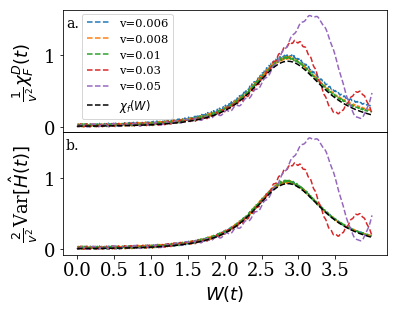

In [1]:
####### Code by Matt Richards ###################################
####
#### This code takes data from a time dynamics simulation 
#### of a BEC-impurity double well model and compares Fidelity Susceptibility
#### to the Quantum Fisher Information.
################################################################


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib 

############################################
### Modify font and text for readability ###
############################################

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}


matplotlib.rc('font', **font)

### Take data from directory ###

dir = "./"
file = "fisher.txt"
fn=np.loadtxt(dir+file, dtype=np.double)
file2 = "fidelitydtsmall.txt"
fn2=np.loadtxt(dir+file2, dtype=np.double)
file1 = "eigenvalues.txt"
fn1=np.loadtxt(dir+file1, dtype=np.double)
nowcol = 'r'
nowpt = 'o'

### Specify first multiplot ###

left, bottom, width, height = [0.15, 0.15, 0.75, 0.425] #This needs to be explicitly written after the first plot is generated 
#to indicate that the plot commands are given for the main plot.
ax = plt.axes([left, bottom, width, height])
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left1, bottom1, width1, height1 = [0.15, 0.575, 0.75, 0.425] #This needs to be explicitly written after the first plot is generated 
#to indicate that the plot commands are given for the main plot.
ax1 = plt.axes([left1, bottom1, width1, height1])

#b=pd.read_csv('probabilitiesv.txt',sep=' ', chunksize=)

k=[0 for i in range(36)] #This is my fancy way of reading in the data for the midpoint between each time i.e. Wcrit=1. 
q=[0 for i in range(20)]
#The reason why is because we need to rescale the energy with the quench speed for various times.
k[0]=0
q[0]=0
   
for i in range(1,36):
    k[i]=2001*i

##########################
### Plotting out data ####
##########################

### Quantum Fisher Information ###
    
for i in range(6,16,2):#The range in which I am looping over is dependant on where I stop time.
    ax.plot(fn[k[i-1]:k[i-1]+401,1], math.pow(fn[k[i-1],2],-2)*2*fn[k[i-1]:k[i-1]+401,0], ls='--', label=r'v=%.6s'%(fn[k[i-1],2]))
    
ax.plot(fn1[0:401,9],fn1[0:401,8],ls='--',color='k',label=r'$\chi_f(W)$')

### Dynamic Fidelity Susceptibility ###

for i in range(6,16,2):#The range in which I am looping over is dependant on where I stop time.
    ax1.plot(fn2[k[i-1]:k[i-1]+401,2], math.pow(fn2[k[i-1],4],-2)*fn2[k[i-1]:k[i-1]+401,1], ls='--', label=r'v=%.6s'%(fn2[k[i-1],4]))
    
ax1.plot(fn1[0:401,9],fn1[0:401,8],ls='--',color='k',label=r'$\chi_f(W)$')

### Plotting options for the data ###

#plt.title("Zero Temperature Quantum Fisher Information \n for the BEC-Impurity double well system")
ax.set_ylabel(r"$\frac{2}{v^2}$Var$[\hat{H}(t)]$")#r"$F(W)=|<E0(W)|E0(W)+\delta W>|^2$")#
ax.set_xlabel(r"$W(t)$")
ax.set_xticks(np.arange(0,4,step=0.5))
ax.text(0.01, 0.95, 'b.', transform=ax.transAxes,
      fontsize=14, fontweight='normal', va='top')
ax1.set_ylabel(r"$\frac{1}{v^2}\chi_F^D(t)$")#r"$F(W)=|<E0(W)|E0(W)+\delta W>|^2$")#
#ax1.set_xlabel(r"W(J)")
ax1.set_xticks(np.arange(0, 0, step=0.5))
#ax1.legend(loc=(0.05,0.15))
ax1.legend(loc=(0.06,.11), borderaxespad=0., prop={'size':11.5})
ax1.text(0.01, 0.95, 'a.', transform=ax1.transAxes,
      fontsize=14, fontweight='normal', va='top')
plt.ticklabel_format(useOffset=False)


plt.show()
#plt.savefig("./"+'Fisher_chit_BEC_defense.jpg',dpi=300)